In [20]:
!pip install utils
import numpy as np
import matplotlib.pyplot as plt
import collections
import utils
from scipy import optimize
%matplotlib inline

In [21]:
with open('/content/ex2data2.txt', 'r') as dataset:
  ds = np.loadtxt(dataset, delimiter=',')

X, y = ds[:, 0:2], ds[:, 2]
m = y.size

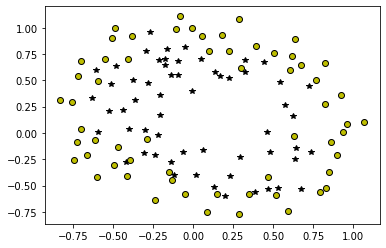

In [22]:

x_pos = []
x_neg = []
fig = plt.figure()
for i in range(len(y)):
  if y[i]==0:
    x_neg.append(X[i])
  else:
    x_pos.append(X[i])
for i in x_pos:
  plt.plot(i[0], i[1], 'k*')
for j in x_neg:
  plt.plot(j[0], j[1], 'ko', mfc='y')


In [23]:
def sigmoid(z):
  z = np.array(z)
  g = np.zeros(np.shape(z))
  g = 1/(1+(np.exp(-z)))
  return g

In [24]:
def map_feature(x1, x2, degree =6):
    if x1.ndim > 0:
        out = [np.ones(x1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))

    if x1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

X = map_feature(X[:, 0], X[:, 1])
print(X)


[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [25]:
def costFunc(theta,x1,y1,lambda1):
  J = 0
  grad = np.zeros(theta.shape)
  h = sigmoid(X.dot(theta.T))
    
  temp = theta
  temp[0] = 0
    
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda1 / (2 * m)) * np.sum(np.square(temp))
    
  grad = (1 / m) * (h - y).dot(X) 
  grad = grad + (lambda1 / m) * temp
    
    # =============================================================
  return J, grad

In [26]:
def predict(theta,x):
  n = X.shape[0]
  p = np.zeros(n)
  p = np.round(sigmoid(X.dot(theta.T)))
  return p

In [27]:
initial_theta = np.zeros(X.shape[1])
cost, grad = costFunc(initial_theta, X, y, 1)

test_theta = np.ones(X.shape[1])
cost, grad = costFunc(test_theta, X, y, 10)


expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6987093209184723
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.7181821447750377
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6997832974806816
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.7297676383499574
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6504646638821235
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6241151165790741
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6697397212419796
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6340936946734379
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.6358061938864892
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.5813005981366302
expected y value =  1.0 ; predicted y value =  1.0  with probability  0.5340491371745852
expected y value =  1

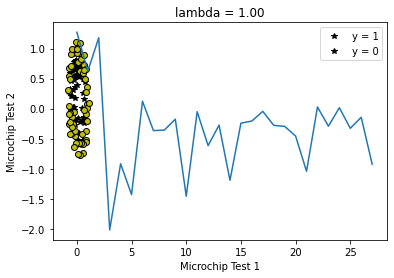

In [28]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1.00

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunc,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='CG',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

#utils.plotDecisionBoundary(plotData, theta, X, y)
fig = plt.figure()
for i in x_pos:
  plt.plot(i[0], i[1], 'k*')
for j in x_neg:
  plt.plot(j[0], j[1], 'ko', mfc='y')
plt.plot(theta)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)
for i in range(len(y)):
  print('expected y value = ', y[i], '; predicted y value = ',p[i], ' with probability ', sigmoid(X.dot(theta.T))[i])
print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')